In [ ]:
!git clone https://github.com/tajuar-akash-hub/Datasets

Cloning into 'Datasets'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 47 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 4.23 MiB | 4.11 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
!pip install bnltk
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

# Import the Libraries

In [ ]:
# Importing libraries for data splitting and evaluation
from sklearn.model_selection import train_test_split  # Splits the dataset into training and testing subsets.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Provides tools for evaluating classification performance (e.g., precision, recall, F1-score, accuracy).
from sklearn.metrics import ConfusionMatrixDisplay  # Visualizes the confusion matrix for model performance evaluation.
from sklearn.metrics import make_scorer, roc_auc_score  # Creates a custom scoring function (e.g., for ROC-AUC) to evaluate models.

# Importing libraries for feature extraction and hyperparameter tuning
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text data into numerical feature vectors using TF-IDF (Term Frequency-Inverse Document Frequency).
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Performs hyperparameter tuning using either an exhaustive search (GridSearchCV) or a random search (RandomizedSearchCV).

# Importing statistical library
from scipy import stats  # Provides statistical functions for random number generation and probability distributions (used in RandomizedSearchCV).

# Importing numerical and machine learning utilities
import numpy as np  # Provides support for large, multi-dimensional arrays and numerical operations on them.
import sklearn.metrics as metrics  # Provides additional metrics for model evaluation (e.g., ROC curve, precision-recall curve).

# Importing utility libraries for text processing and analysis
import collections  # Provides specialized container datatypes, such as Counter, for counting occurrences.
import nltk  # Natural Language Toolkit for text processing tasks like tokenization, stemming, and more.
import pandas as pd  # Library for data manipulation and analysis, particularly useful for handling tabular data.

# Importing libraries for file handling
import codecs  # Provides tools to read and write files with specific encodings (e.g., UTF-8, UTF-16).

# Importing visualization libraries
import matplotlib.pyplot as plt  # Used for creating static, interactive, and animated visualizations.

# Importing Bangla-specific text tokenization tool
from bnltk.tokenize import Tokenizers  # A Bangla-specific tokenizer from the bnltk library for splitting Bangla sentences into words.

# Command to check details of the bnltk library
!pip show bnltk  # Displays metadata about the installed 'bnltk' library (e.g., version, author, dependencies).


Name: bnltk
Version: 0.7.8
Summary: BNLTK(Bangla Natural Language Processing Toolkit)
Home-page: https://github.com/ashwoolford/bnltk
Author: Asraf Patoary
Author-email: asrafhossain197@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.11/dist-packages
Requires: black, keras, numpy, requests, scikit-learn, tensorflow
Required-by: 


In [ ]:
INPUT_FILE = "/content/Datasets/ecommerce_dataset.txt"
stopwords_list ="/content/Datasets/stopwords.txt"

# Data Preparation and cleaning

In [ ]:
import collections
import codecs
import string

# Initialize the tokenizer and counter
counter = collections.Counter()
tokenizer = Tokenizers()
maxlen = 0
xs, ys = [], []

# Load stopwords
bangla_stopwords = codecs.open(stopwords_list, 'r', encoding='utf-8').read().split()

# Open the input file
fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')

# Define punctuation marks (adjust for Bangla punctuation if necessary)
punctuation_marks = set(string.punctuation)  # You can add any specific punctuation for Bengali as well if needed

# Process the file line by line
for line in fin:
    _, sent = line.strip().split("\t")  # Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ", sent)

    # Tokenize the sentence
    words = tokenizer.bn_word_tokenizer(sent)
    print("After Tokenizing:", words)

    # Exclude punctuation marks
    wordsExcludingPunctuationMarks = [word for word in words if word not in punctuation_marks]
    print("After Excluding Punctuation Marks:", wordsExcludingPunctuationMarks)

    # Exclude stopwords
    wordsExcludingStopwords = [word for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("After Excluding Stopwords:", wordsExcludingStopwords)

    # Update maxlen for sentence length
    if len(wordsExcludingStopwords) > maxlen:
        maxlen = len(wordsExcludingStopwords)

    # Update word frequency counter
    for word in wordsExcludingStopwords:
        counter[word] += 1

    print("***************************************************************************************")

    # Append sentence and label for further processing
    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopwords))

# Close the input file
fin.close()


In [ ]:
xs

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও । বাট পুরাই বাজে',
 'আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি । অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫ ৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি এক এক বারও আসে না ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের শার্ট দাম ৪৯৫ টাকা । ঈদের বেড়ে ৫৯৫ টাকা । সবচেয়ে বড় কথা এক সপ্তার কালার ।',
 'ধন্যবাদ ভাল মানের কাপড় ।',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর । কোয়ালিটি ফুল । প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া । একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল । ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই । ভারী না বহন বুদ্ধিমানের ।',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি ন

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf= True, tokenizer=lambda x: x.split())

Xtrain_tf=tfidf.fit_transform(Xtrain)

print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

n_samples: 1223, n_features: 13854


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#transforming test data into tf-idf matrix

Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

n_samples: 408, n_features: 13854


# Model Building

## Naive Bayes

[[167  37]
 [ 11 193]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       204
           1       0.84      0.95      0.89       204

    accuracy                           0.88       408
   macro avg       0.89      0.88      0.88       408
weighted avg       0.89      0.88      0.88       408



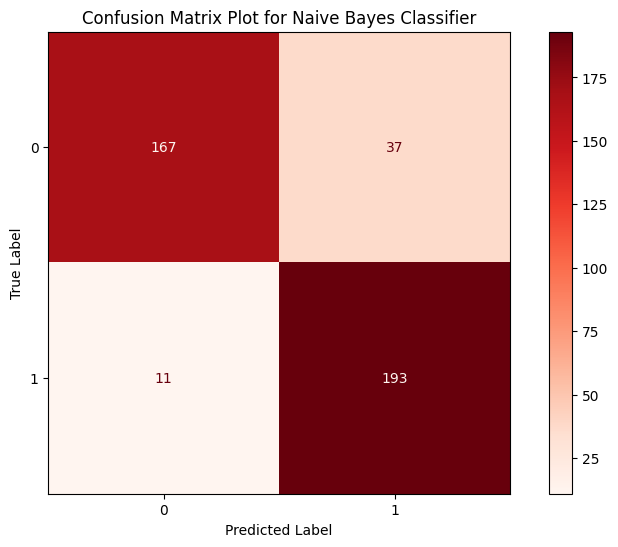

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

# Fit the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)

# Predict on the test data
y_pred = naive_bayes_classifier.predict(Xtest_tf)

# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()


In [ ]:
fprNB, tprNB, thresholdNB=metrics.roc_curve(Ytest, y_pred)

# Logistic Regression

[[161  43]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       204
           1       0.82      0.95      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



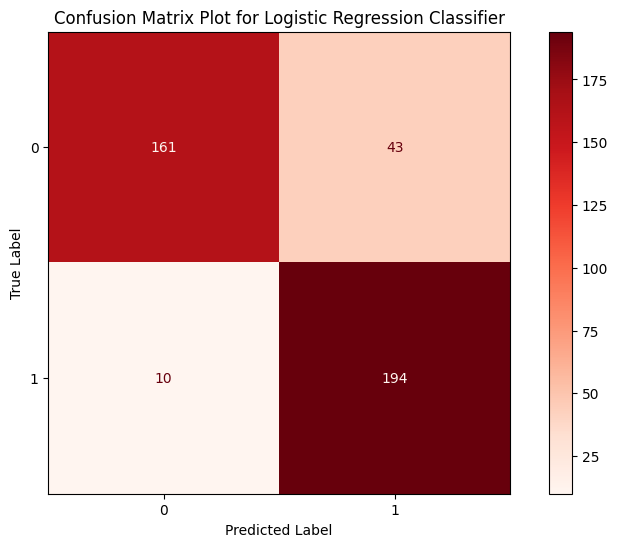

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit the Logistic Regression classifier
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)

# Predict on the test data
y_pred = LRClassification.predict(Xtest_tf)

# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[175  29]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       204
           1       0.85      0.83      0.84       204

    accuracy                           0.85       408
   macro avg       0.85      0.85      0.85       408
weighted avg       0.85      0.85      0.85       408



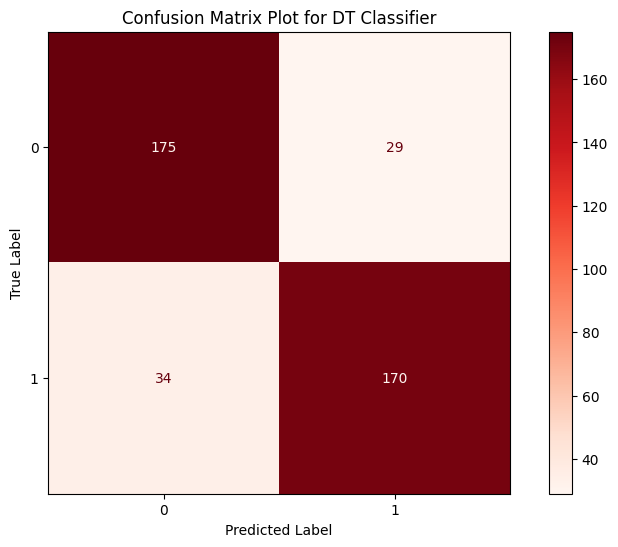

In [ ]:
# Print confusion matrix and classification report

print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for DT Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

# Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[181  23]
 [ 18 186]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



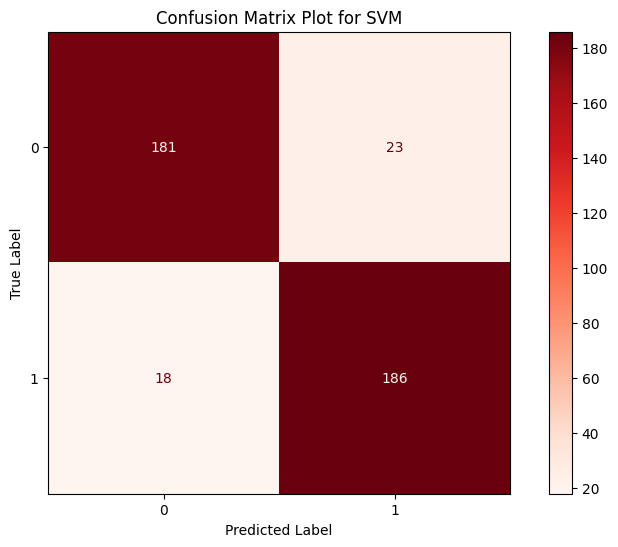

In [ ]:
# Print confusion matrix and classification report

print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SVM', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[142  62]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       204
           1       0.76      0.95      0.84       204

    accuracy                           0.82       408
   macro avg       0.85      0.82      0.82       408
weighted avg       0.85      0.82      0.82       408



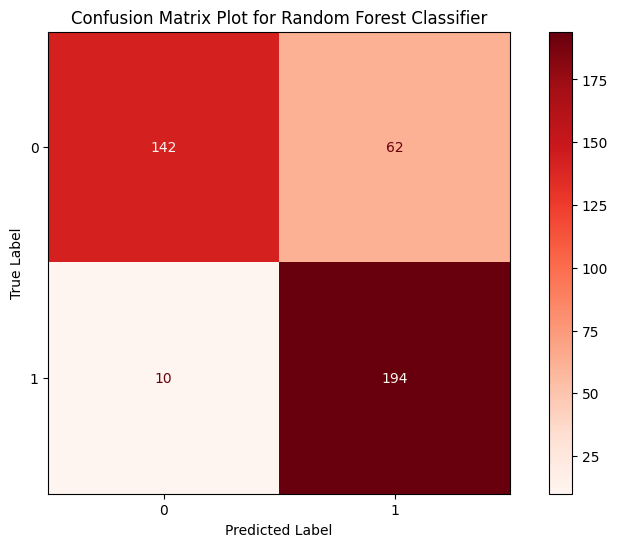

In [ ]:
# Print confusion matrix and classification report
print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

# SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss = 'log_loss',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[175  29]
 [ 12 192]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       204
           1       0.87      0.94      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



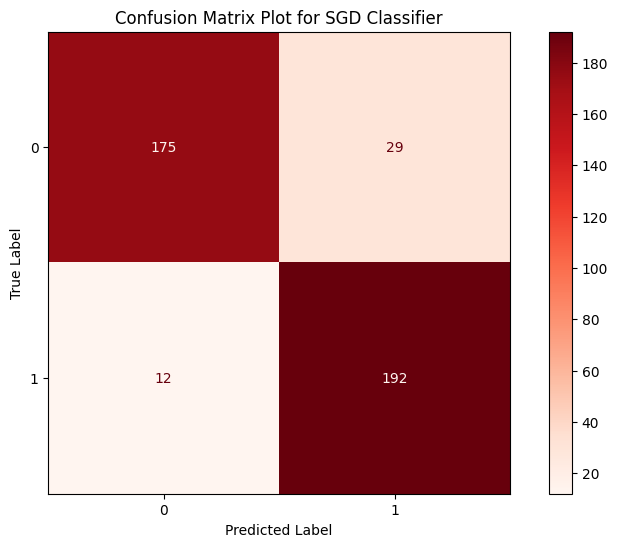

In [ ]:
# Print confusion matrix and classification report

print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map

matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

# Randomized Search CV

In [ ]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}

rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 5, random_state = 2017, scoring = auc)
rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)


## Result of Randomized Search CV

In [ ]:
# Import pandas for tabular display
import pandas as pd

# Convert cv_results_ to a DataFrame for better visualization
results_df = pd.DataFrame(rand_search.cv_results_)

# Select and display relevant columns
# Showing the parameters, mean test score, and rank

results_df = results_df[[
    'params',  # The hyperparameter combination
    'mean_test_score',  # Mean cross-validated score for this combination
    'std_test_score',  # Standard deviation of the cross-validated score
    'rank_test_score'  # Rank of the score (1 = best)
]]

# Sort by rank to view the best combinations at the top
results_df = results_df.sort_values(by='rank_test_score')

# Display the results
print(results_df)

In [ ]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest, rand_predictions)

# Grid Search CV

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 12, 'gamma': 0.1, 'kernel': 'rbf'}
Best ROC-AUC Score: 0.887907600629684
[[182  22]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



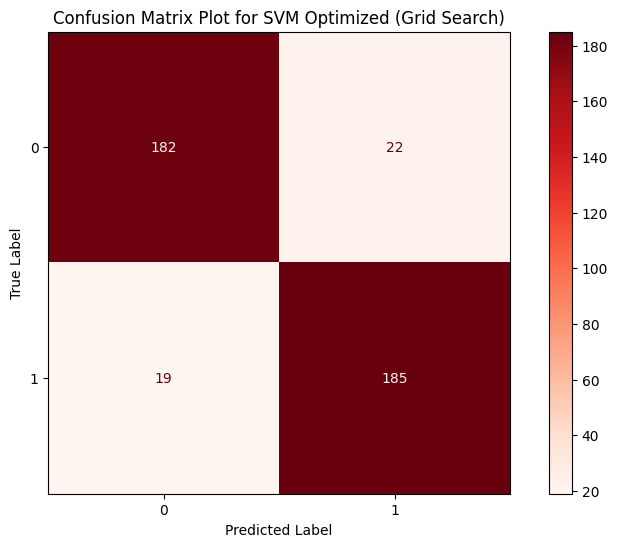

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn import svm

# Initialize the SVM classifier
svm_clf = svm.SVC(probability=True, random_state=1)

# Define a grid of hyperparameters for Grid Search
param_grid = {
    "C": [2, 4, 6, 8, 10, 12],  # Specific values for the regularization parameter
    "gamma": [0.1, 0.2, 0.3, 0.5, 0.7, 1.0],  # Specific values for the kernel coefficient
    "kernel": ["rbf"]  # Use only the RBF kernel
}

# Define the scoring method (Area Under the ROC Curve)
auc = make_scorer(roc_auc_score)

# Set up GridSearchCV with the specified parameter grid
grid_search = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    scoring=auc,  # Use AUC as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for faster processing
    verbose=2  # Display progress for each combination
)

# Fit GridSearchCV to the training data
grid_search.fit(Xtrain_tf, Ytrain)

# Display the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Predict using the best model
grid_predictions = grid_search.predict(Xtest_tf)

# Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(confusion_matrix(Ytest, grid_predictions))
print(classification_report(Ytest, grid_predictions))




# Plot confusion matrix

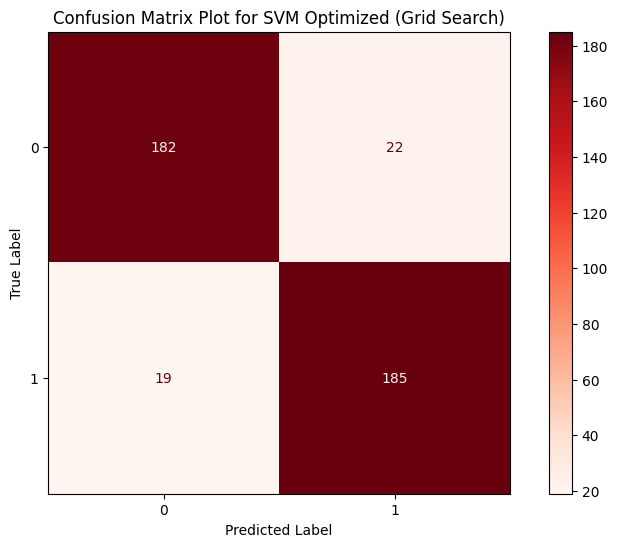

In [ ]:

cm = confusion_matrix(Ytest, grid_predictions)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
matrix.plot(cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Optimized (Grid Search)', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)
plt.show()


# Generate ROC curve metrics for Grid Search Optimized SVM

In [ ]:
from sklearn import metrics


In [ ]:
fprSVM_optimized_grid, tprSVM_optimized_grid, thresholds_optimized = metrics.roc_curve(Ytest, grid_predictions)

[[175  29]
 [ 12 192]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       204
           1       0.87      0.94      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



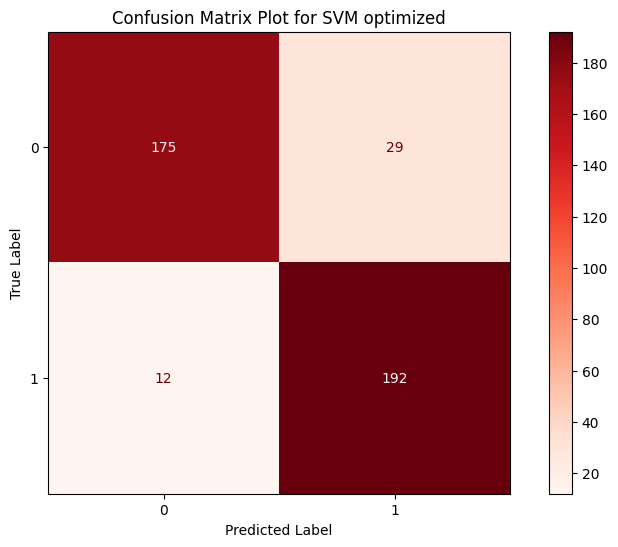

In [ ]:
# Print confusion matrix and classification report

print(confusion_matrix(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a ConfusionMatrixDisplay object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix with a color map
matrix.plot(cmap=plt.cm.Reds)

# Customize the plot
matrix.ax_.set_title('Confusion Matrix Plot for SVM optimized', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

In [ ]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

# The difference between **Grid Search CV** and **Randomized Search CV** lies in how they explore the hyperparameter space:

---

### **Grid Search CV**
- **Explores all possible combinations** of the hyperparameters provided in the search grid.
- The user specifies **specific values** for each hyperparameter, and **every combination** of those values is tested.
- **Exhaustive Search**: It guarantees that the best combination (within the specified grid) is found but can be computationally expensive for large grids.
  
**Example:**
```python
param_grid = {
    'C': [2, 4, 6, 8],       # Fixed values for C
    'gamma': [0.1, 0.2, 0.3], # Fixed values for gamma
    'kernel': ['rbf']         # One specific kernel
}
```
- Grid Search CV will test **4 × 3 × 1 = 12 combinations** of hyperparameters.

---

### **Randomized Search CV**
- **Randomly samples a fixed number of combinations** of hyperparameters from a specified range or distribution.
- The user specifies a **range or distribution** for each hyperparameter, and `n_iter` determines how many combinations to randomly test.
- **Faster and more efficient** for large hyperparameter spaces but may miss the best combination.

**Example:**
```python
param_distributions = {
    'C': stats.uniform(2, 10),      # Continuous range [2, 12]
    'gamma': stats.uniform(0.1, 1), # Continuous range [0.1, 1.1]
    'kernel': ['rbf']               # One specific kernel
}
```
- Randomized Search CV will test **n_iter=20 random combinations** from the ranges provided.

---

### **Why Specifying Exact Values Makes It Grid Search CV**
When you specify **exact values** for hyperparameters (e.g., `C = [2, 4, 6, 8]`), it becomes a **Grid Search CV** because:
1. It explores **all combinations** of the specified values systematically.
2. There is **no randomness** involved in the search process. Every possible combination from the grid is tested.

### **Why Specifying Ranges or Distributions Makes It Randomized Search CV**
When you specify **ranges** or **distributions** (e.g., `C = stats.uniform(2, 10)`), it becomes a **Randomized Search CV** because:
1. It uses randomness to sample combinations from the given ranges.
2. It does **not test every possible combination**, only a fixed number (`n_iter`).

---

### **Summary**
- **Grid Search CV**: Exhaustively tests all combinations of **specific values** you provide. It’s systematic.
- **Randomized Search CV**: Randomly samples combinations from **ranges or distributions** you provide. It’s probabilistic.

So, if you specify **exact values**, it is **Grid Search CV** because there's no randomness: all combinations are tested. If you specify **ranges or distributions**, it is **Randomized Search CV** because randomness is involved.

# Generate AUC Curve For all Models


<Figure size 640x480 with 0 Axes>

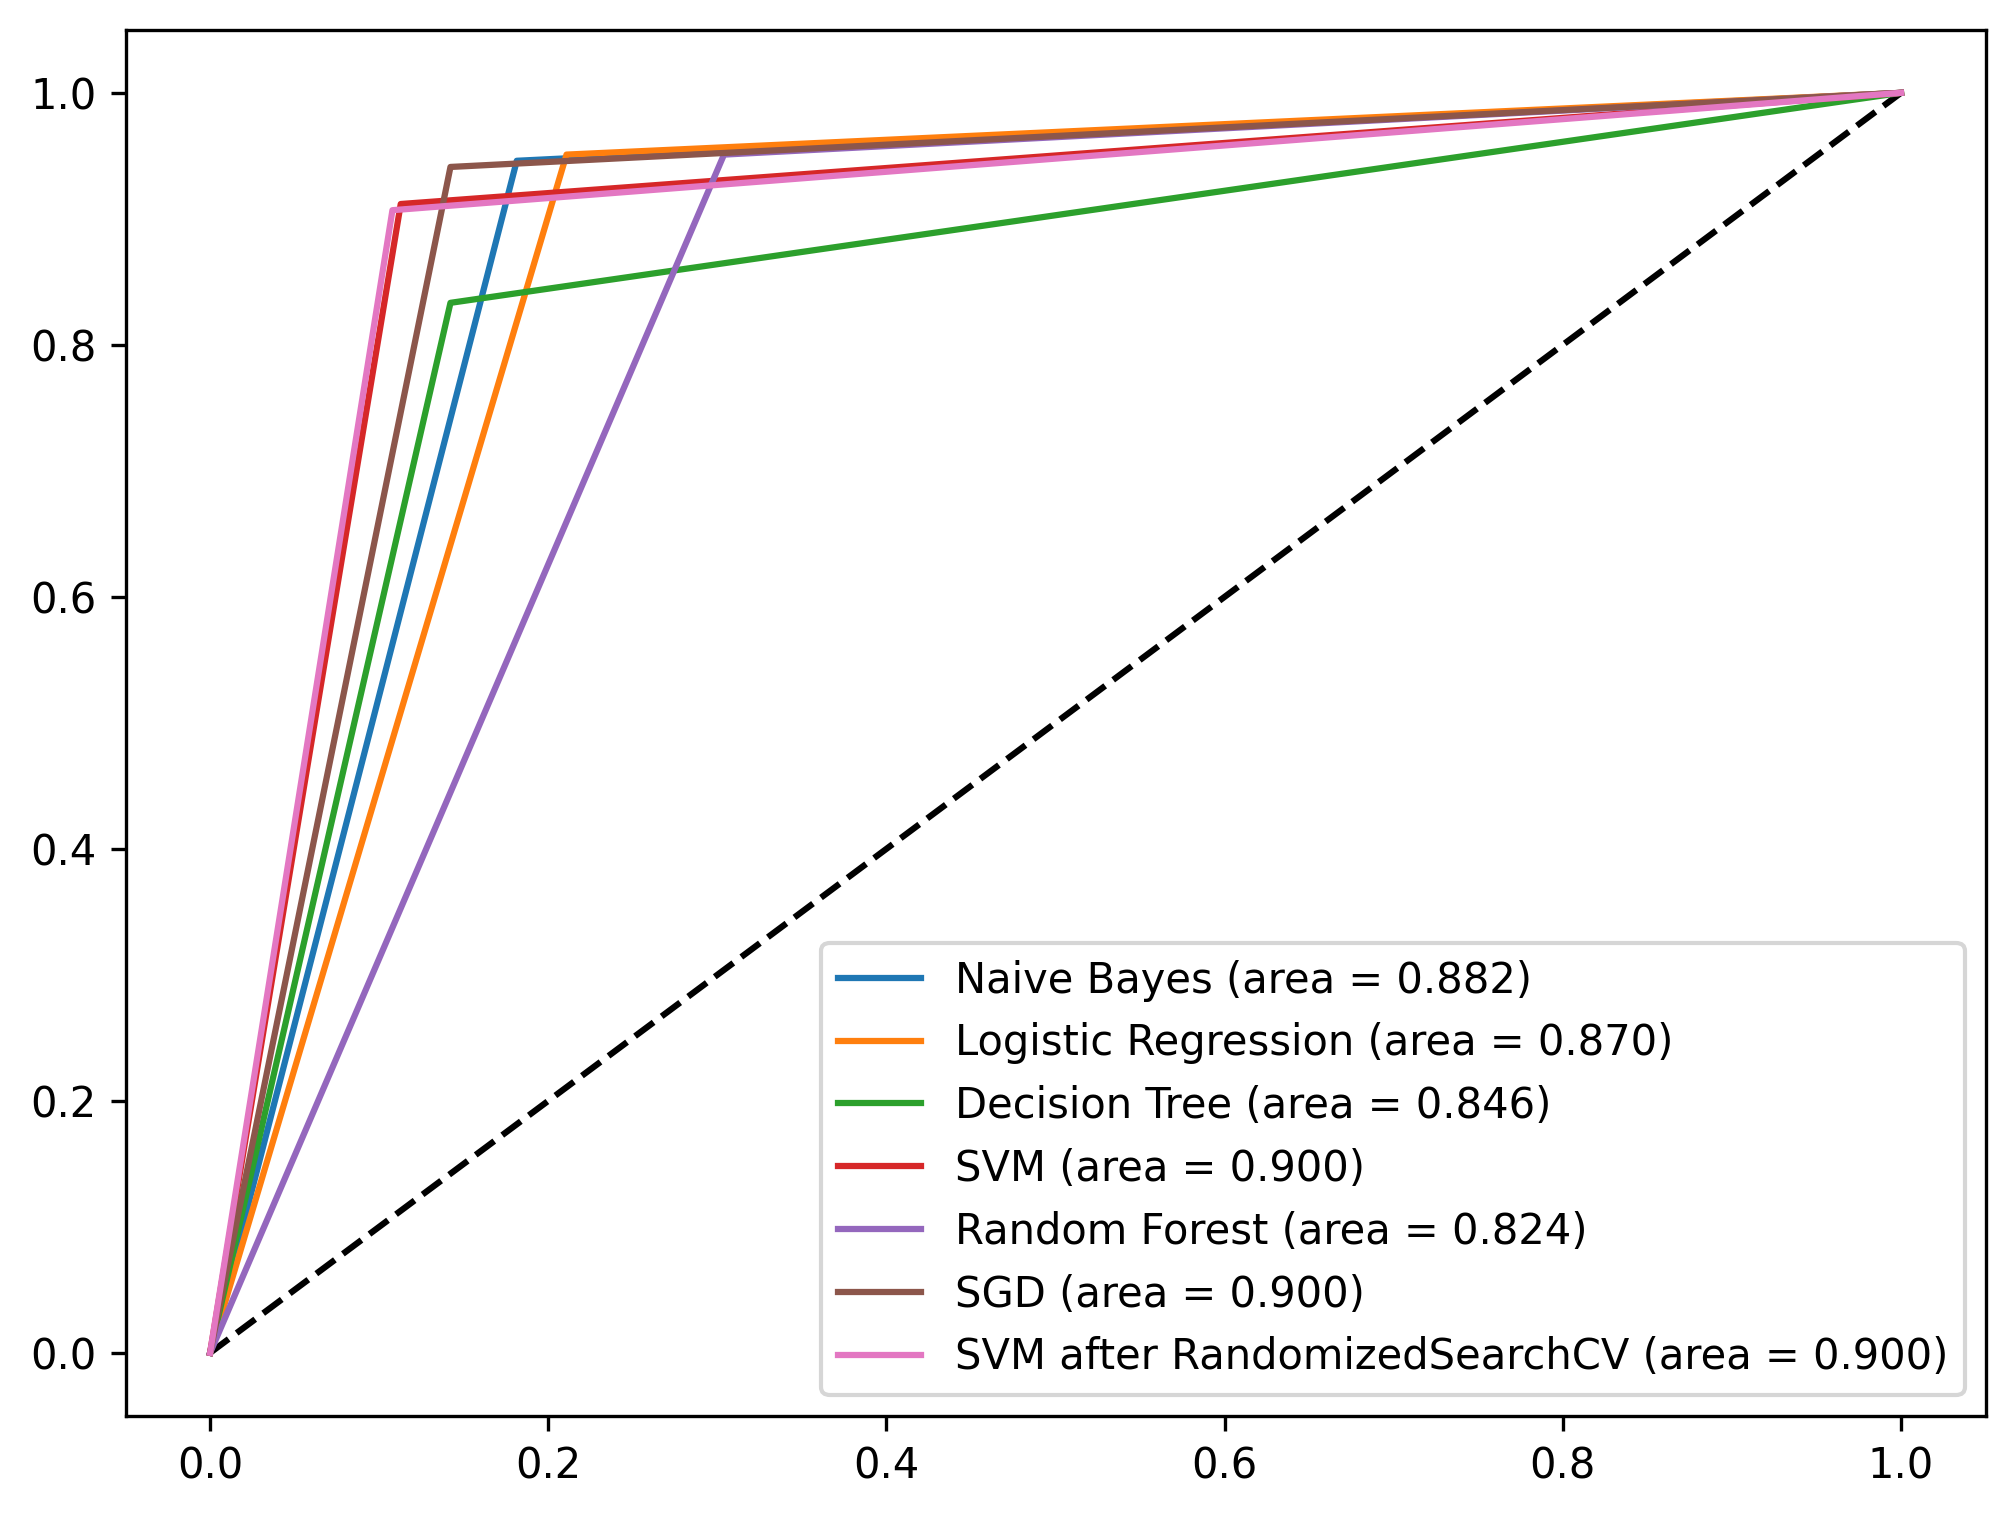

In [ ]:
from matplotlib import pyplot as plt
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))



plt.legend(loc='lower right')
plt.show()

# SVM Optimized Grid search vs randomized Search

<Figure size 640x480 with 0 Axes>

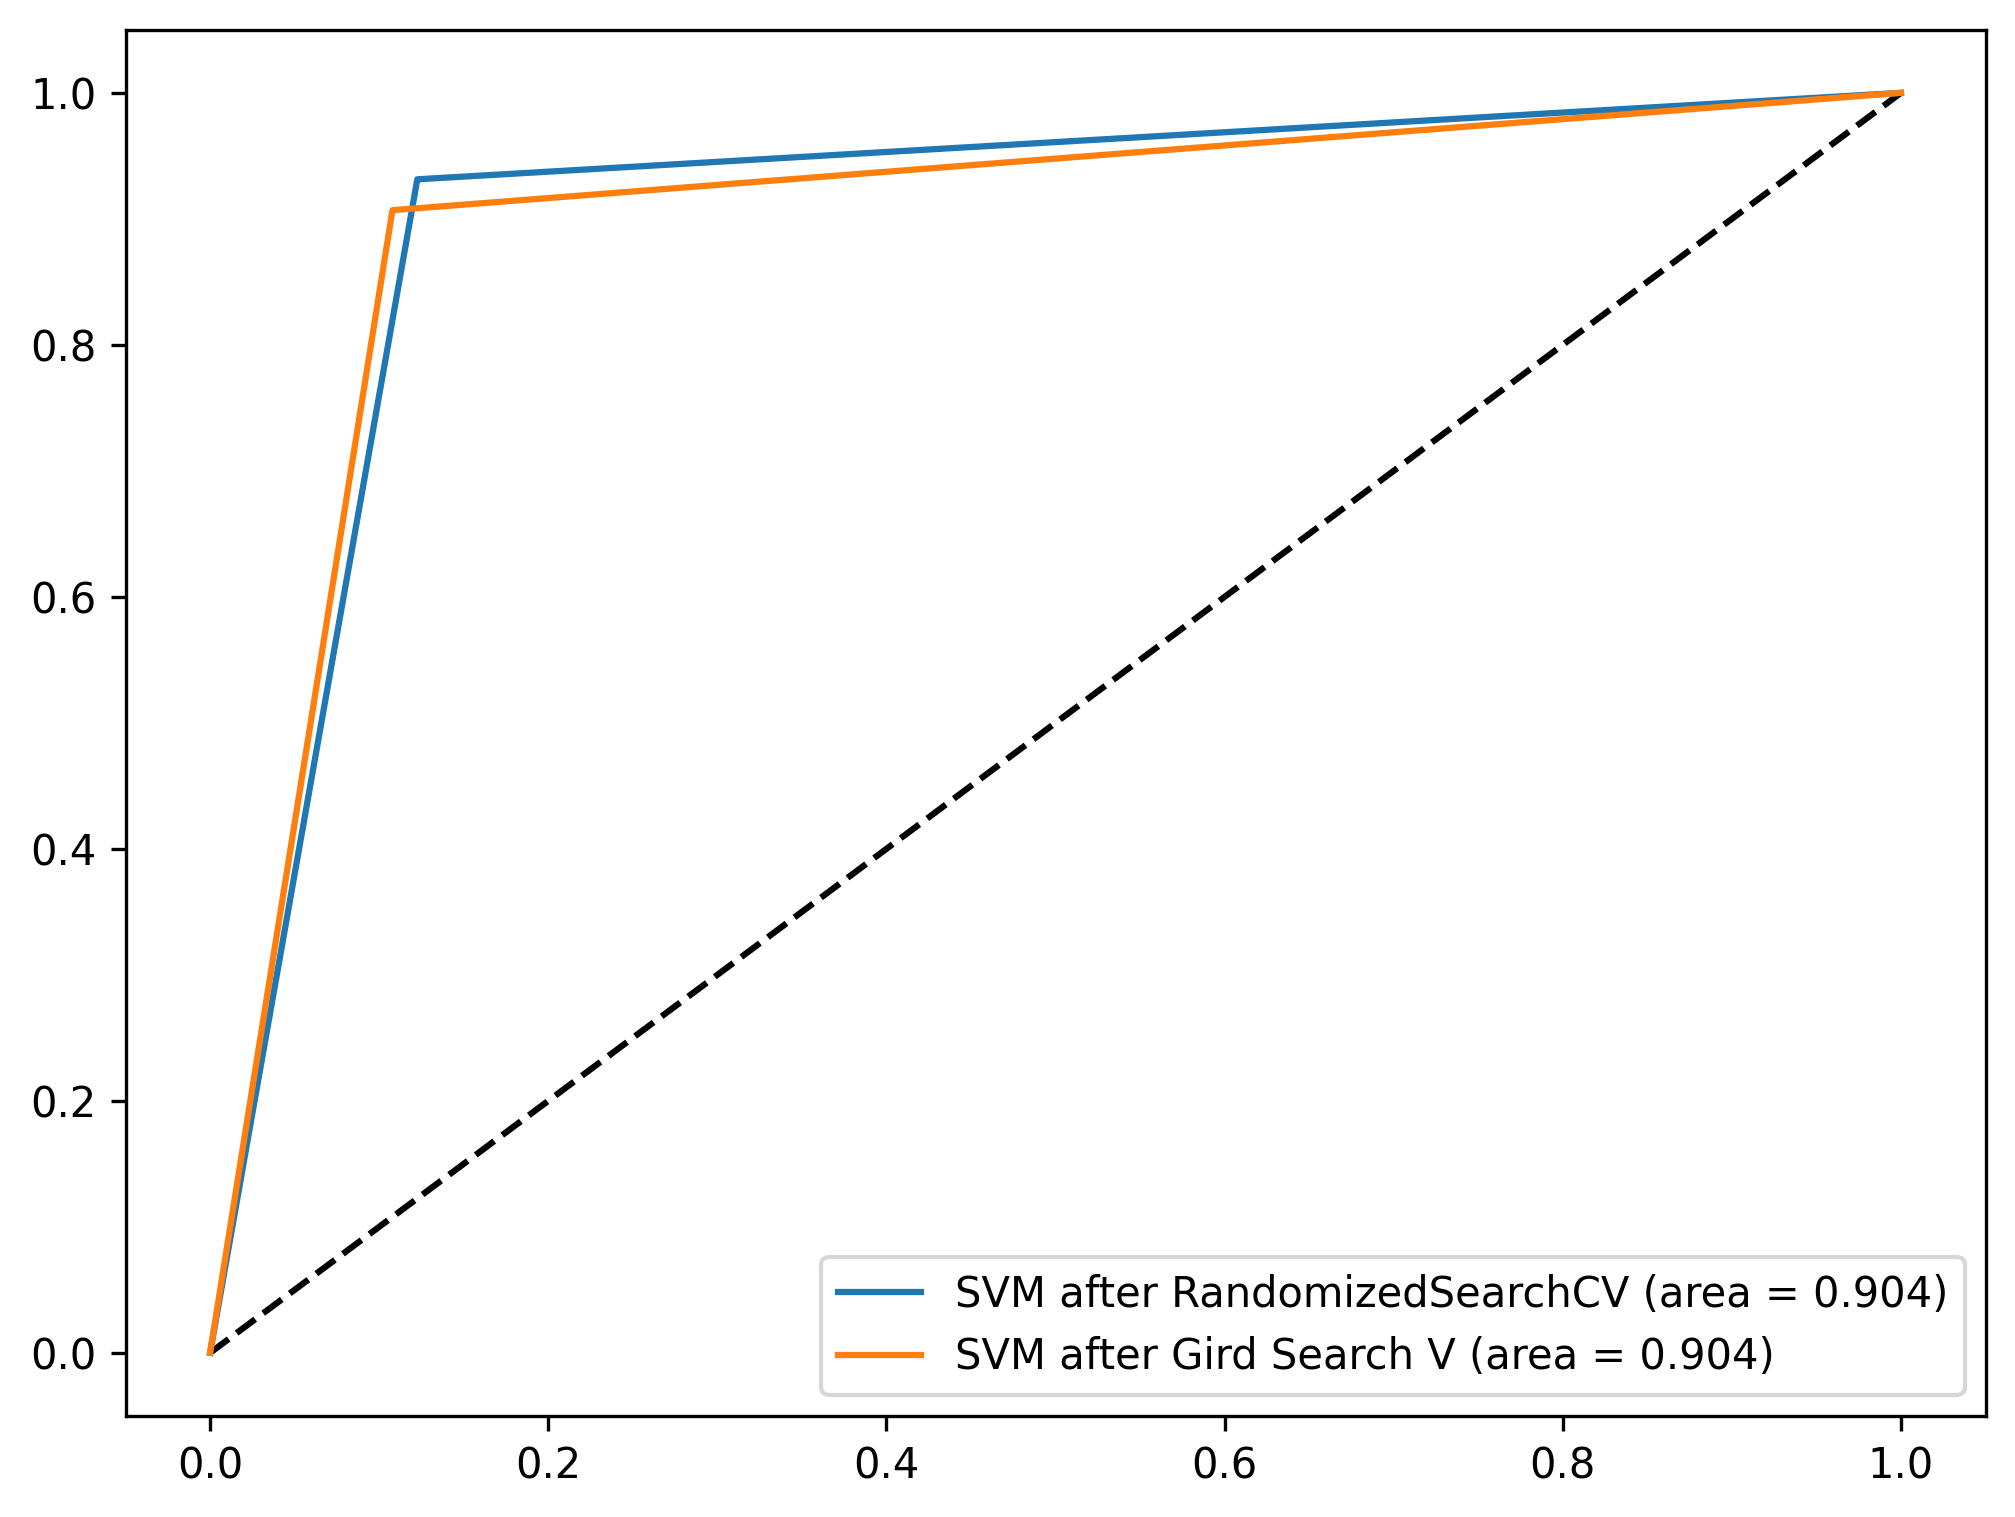

In [ ]:
from matplotlib import pyplot as plt
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')


auc_SVM_optimized_randomized_search = auc(fprSVM_optimized, tprSVM_optimized)
auc_SVM_optimized_grid_search = auc(fprSVM_optimized, tprSVM_optimized)


plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized_randomized_search))
plt.plot(fprSVM_optimized_grid, tprSVM_optimized_grid, label='SVM after Gird Search V (area = {:.3f})'.format(auc_SVM_optimized_grid_search))




plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install joblib

In [ ]:
import cloudpickle

# Save the SVM Optimized model
with open('/content/drive/MyDrive/SEN/svm_optimized_model.pkl', 'wb') as f:
    cloudpickle.dump(rand_search, f)

# Save the Tfidf Vectorizer
with open('/content/drive/MyDrive/SEN/tfidf_vectorizer.pkl', 'wb') as f:
    cloudpickle.dump(tfidf, f)

In [ ]:
# Load the SVM Optimized model
with open('/content/drive/MyDrive/SEN/svm_optimized_model.pkl', 'rb') as f:
    rand_search = cloudpickle.load(f)

# Load the Tfidf Vectorizer
with open('/content/drive/MyDrive/SEN/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = cloudpickle.load(f)

In [ ]:
def predict_sentiment_svm(input_sentence):
    # Tokenize and transform the input sentence just like you did with the training data
    words = tokenizer.bn_word_tokenizer(input_sentence)
    wordsExcludingPunctuationMarks = [word for word in words if word not in punctuation_marks]
    wordsExcludingStopwords = [word for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    transformed_input = tfidf.transform([' '.join(wordsExcludingStopwords)])

    # Predict using the SVM Optimized model
    prediction = rand_search.predict(transformed_input)

    # Print the predicted sentiment
    print(f"Predicted Sentiment: {'Positive' if prediction[0] == 1 else 'Negative'}")


In [ ]:
# Test the function with an input sentence
input_sentence = "এই পণ্যটি কাজ করছে না।"
predict_sentiment_svm(input_sentence)


Predicted Sentiment: Negative
